In [92]:
import pandas as pd
airline_reviews = pd.read_csv('british_airways_reviews.csv')

In [93]:
airline_reviews.head(2)

,Customer Rating(out of 10),Review Date,Review,Type_of_traveler,Seat_type,Route,Date_flown,Seat_comfort,Cabin_Staff_service,Ground_service,Value_for_money
0,1.0,16th July 2024,Not Verified| Singapore to Heathrow. Busines...,Family Leisure,Business Class,Singapore to London,July 2024,3.0,2.0,5.0,2
1,1.0,15th July 2024,Not Verified| I reported my damaged/ruined s...,Solo Leisure,Economy Class,Glasgow to Munich via Heathrow,June 2024,3.0,4.0,2.0,3


In [94]:
airline_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer Rating(out of 10)  3596 non-null   float64
 1   Review Date                 3600 non-null   object 
 2   Review                      3600 non-null   object 
 3   Type_of_traveler            3053 non-null   object 
 4   Seat_type                   3598 non-null   object 
 5   Route                       3049 non-null   object 
 6   Date_flown                  3046 non-null   object 
 7   Seat_comfort                3478 non-null   float64
 8   Cabin_Staff_service         3465 non-null   float64
 9   Ground_service              2975 non-null   float64
 10  Value_for_money             3600 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 309.5+ KB


In [95]:
# extracting only reviews data

airline_reviews = airline_reviews[['Customer Rating(out of 10)', 'Review']]

In [96]:
# checking for null values
airline_reviews.isna().sum()

Customer Rating(out of 10)    4
Review                        0
dtype: int64

In [97]:
airline_reviews[airline_reviews['Customer Rating(out of 10)'].isna()] 

,Customer Rating(out of 10),Review
3248,NaN,Cabin crew polite unfortunately BA ran out of ...
3378,NaN,Phoenix to London - outbound a wonderful and e...
3395,NaN,On past experience I chose BA for our long hau...
3400,NaN,On past experience I chose BA for our long hau...


In [98]:
airline_reviews.dropna(inplace=True)

In [99]:
#checking for duplicates
len(airline_reviews) - len(airline_reviews.drop_duplicates())

14

In [100]:
duplicate_rows = airline_reviews[airline_reviews.duplicated()]
duplicate_rows

,Customer Rating(out of 10),Review
2680,8.0,British Airways from Tampa to Gatwick on Boein...
2682,6.0,London Heathrow to Miami on one of British Air...
3100,10.0,Business class. Scheduled to fly from Rome to ...
3306,2.0,Just back from a fantastic 2.5 week trip to Th...
3307,10.0,San Diego-LHR-MAN. On 6th January we flew from...
3308,8.0,Flew MEX-LHR-TLS with BA and was very surprise...
3309,10.0,BA 870 22nd Dec 2014. Flew from London to Buda...
3310,1.0,I have used British Airways over a number of y...
3311,6.0,LHR - Helsinki in Business Class. I happened t...
3312,6.0,MAN-LHR-LAX. Flew Manchester to LAX via Heathr...


In [101]:
airline_reviews = airline_reviews.drop_duplicates()

In [102]:

# encoding the ratings to positive,neutral and negative 

def encode_ratings(rating):
    if rating > 7:
        return 'positive'
    elif rating > 4 and rating <= 7:
        return 'neutral'
    else:
        return 'negative'
    

airline_reviews['Sentiment'] = airline_reviews['Customer Rating(out of 10)'].apply(encode_ratings)

In [103]:
airline_reviews.drop('Customer Rating(out of 10)', axis=1, inplace=True)

In [104]:
airline_reviews.head(2)

,Review,Sentiment
0,Not Verified| Singapore to Heathrow. Busines...,negative
1,Not Verified| I reported my damaged/ruined s...,negative


In [105]:
# Removing the parts before | in the reviews column

def remove_before_pipe(text):
    if '|' in text[:15]:
        return text[text.find('|')+1:].strip()
    
    return text

airline_reviews["Review"]= airline_reviews["Review"].apply(remove_before_pipe)

In [106]:
airline_reviews.sample(2)

,Review,Sentiment
3570,LHR-PHL on a 787 Dreamliner seat 3K. I recomme...,positive
2591,British Airways flight from London Heathrow to...,negative


In [47]:
# stopwords removal

In [52]:
# !pip install nltk

In [53]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [111]:
airline_reviews['num_chars'] = airline_reviews['Review'].apply(lambda x:len(x))
airline_reviews['num_words'] = airline_reviews['Review'].apply(lambda x: len(nltk.word_tokenize(x)))
airline_reviews['num_sentences'] = airline_reviews['Review'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [118]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    non_alphanumeric_words = []
    for word in text:
        if word.isalnum():
            non_alphanumeric_words.append(word)

    non_stopwords_words = []
    for word in non_alphanumeric_words:
        if word not in stopwords.words('english') and word not in string.punctuation:
            non_stopwords_words.append(word)

    text = []
    for word in non_stopwords_words:
        text.append(ps.stem(word))


    return " ".join(text)
airline_reviews['transformed_review'] = airline_reviews['Review'].apply(transform_text)

In [119]:
airline_reviews.sample(2)

,Review,Sentiment,num_chars,num_words,num_sentences,transformed_review
2872,Excellent British Airways flight from Heathrow...,positive,363,68,5,excel british airway flight heathrow johannesb...
750,San Diego to Stockholm via London. Had I writt...,neutral,2657,524,27,san diego stockholm via london written review ...


In [128]:

from wordcloud import WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(df, sentiment):
    import matplotlib.pyplot as plt

    wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
    wordcloud = wc.generate(df[df['Sentiment'] == sentiment]['transformed_review'].str.cat(sep=" "))
    plt.figure(figsize=(15, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


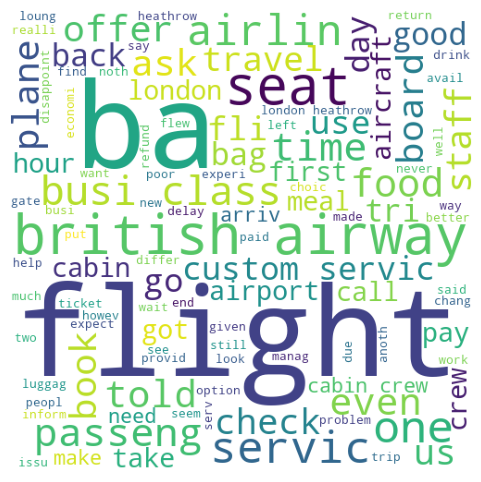

In [129]:
plot_wordcloud(airline_reviews, 'negative')


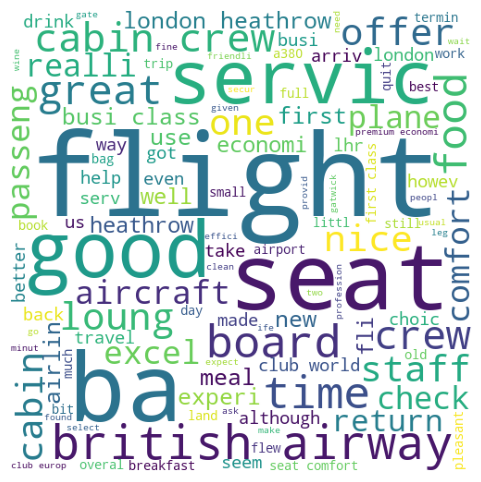

In [130]:
plot_wordcloud(airline_reviews, 'positive')


In [131]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
airline_reviews['Sentiment_encoding'] = label_encoder.fit_transform(airline_reviews['Sentiment'])

In [136]:
airline_reviews['Sentiment_encoding'].sample(10)

1333    0
1641    0
646     0
148     1
2411    2
79      1
1039    0
2691    0
2152    1
1608    0
Name: Sentiment_encoding, dtype: int32

In [137]:
# model building

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(airline_reviews['transformed_review']).toarray()
y = airline_reviews['Sentiment_encoding'].values

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()


In [156]:
mnb.fit(X_train,y_train)


MultinomialNB()

In [159]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
y_pred = mnb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred)}")
print(f"Classfication Report: \n{classification_report(y_test,y_pred)}")

Accuracy: 0.7126917712691772
Confusion Matrix: 
 [[314  74   9]
 [ 36  48  48]
 [ 24  15 149]]
Classfication Report: 
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       397
           1       0.35      0.36      0.36       132
           2       0.72      0.79      0.76       188

    accuracy                           0.71       717
   macro avg       0.64      0.65      0.64       717
weighted avg       0.72      0.71      0.72       717



In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(airline_reviews['transformed_review']).toarray()

In [161]:
from sklearn.model_selection import train_test_split
X_tfidf_train,X_tfidf_test,ytfidf_train,ytfidf_test = train_test_split(X_tfidf,y,test_size=0.2,random_state=22)
from sklearn.naive_bayes import MultinomialNB

mnb_2 = MultinomialNB()


In [162]:
mnb_2.fit(X_tfidf_train,ytfidf_train)


MultinomialNB()

In [164]:
y_tfidf_pred = mnb_2.predict(X_tfidf_test)
print(f"Accuracy: {accuracy_score(ytfidf_test,y_tfidf_pred)}")
print(f"Confusion Matrix: \n {confusion_matrix(ytfidf_test,y_tfidf_pred)}")
print(f"Classfication Report: \n{classification_report(ytfidf_test,y_tfidf_pred)}")

Accuracy: 0.7252440725244073
Confusion Matrix: 
 [[382   6   9]
 [ 74   7  51]
 [ 57   0 131]]
Classfication Report: 
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       397
           1       0.54      0.05      0.10       132
           2       0.69      0.70      0.69       188

    accuracy                           0.73       717
   macro avg       0.66      0.57      0.54       717
weighted avg       0.69      0.73      0.66       717



In [165]:
y_tfidf_pred[0]

0

In [166]:
X_train[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [191]:
def decode_output(output):
    if output == 0:
        return 'Negative'
    elif output == 1:
        return 'Neutral'
    else:
        return 'Positive'

In [192]:
review = "The flight was very good and the staff was very helpful"
test_review1 = tfidf.transform([review])
sentiment =mnb_2.predict(test_review1)
decode_output(sentiment[0])

'Positive'